In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-analysis/Loan Data/Data_Dictionary.xlsx
/kaggle/input/loan-approval-analysis/Loan Data/loan.xlsx


# Importing nececssary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Data Preparation

In [3]:
df = pd.read_excel("/kaggle/input/loan-approval-analysis/Loan Data/loan.xlsx")
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Understanding the meaning of different columns in the dataset  

In [4]:
column_description = pd.read_excel("/kaggle/input/loan-approval-analysis/Loan Data/Data_Dictionary.xlsx")
# Set the display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Concatenate "LoanStatNew" and "Description" columns
column_description['Combined'] = column_description['LoanStatNew'] + ' - ' + column_description['Description']

# Display all rows with the combined column
print(column_description[['Combined']].to_string(col_space=150))

                                                                                                                                                                                                                                                                                                                                                                              Combined
0                                                                                                                                                                                                                                                                                                     acc_now_delinq - The number of accounts on which the borrower is now delinquent.
1                                                                                                                                                                                                                                                         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: datetime64[ns](5), float64(76), int64(13), object(17)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,0.120212,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,0.488322,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,0.037248,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,0.283326,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,0.092500,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,0.254000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
(df.isnull().sum()/len(df)) * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.030214
zip_code  

In [8]:
del_null = []
null_pct = ((df.isnull().sum())/ len(df)) * 100
for col in df.columns:
    if null_pct[col] > 20:
        del_null.append(col)
        df.drop(col,axis=1, inplace=True)
print(del_null)

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot

In [9]:
len(del_null)

58

In [10]:
df.shape

(39717, 53)

# Understanding what these classes from our target variable mean

Fully Paid: This class indicates that the loan has been fully repaid by the borrower. It means that the borrower has fulfilled all the repayment obligations, including the principal amount and any interest or fees associated with the loan.

Charged Off: This class indicates that the lender has declared the loan as a loss or written it off as unlikely to be repaid fully. It means that the borrower has failed to make the required payments, and the lender has determined that the loan is unlikely to be recovered in full.

Current: This value indicates that the loan is currently active, and the borrower is making regular payments as agreed upon. The loan is still ongoing, and the borrower has not yet fully repaid the loan amount.

# Let us transform categorical columns into numerical

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
# Identify the categorical columns in the Train DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert the columns to string data type
df[categorical_columns] = df[categorical_columns].astype(str)

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Correlation Matrix

In [12]:
correlation_matrix = df.corr()

/tmp/ipykernel_20/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


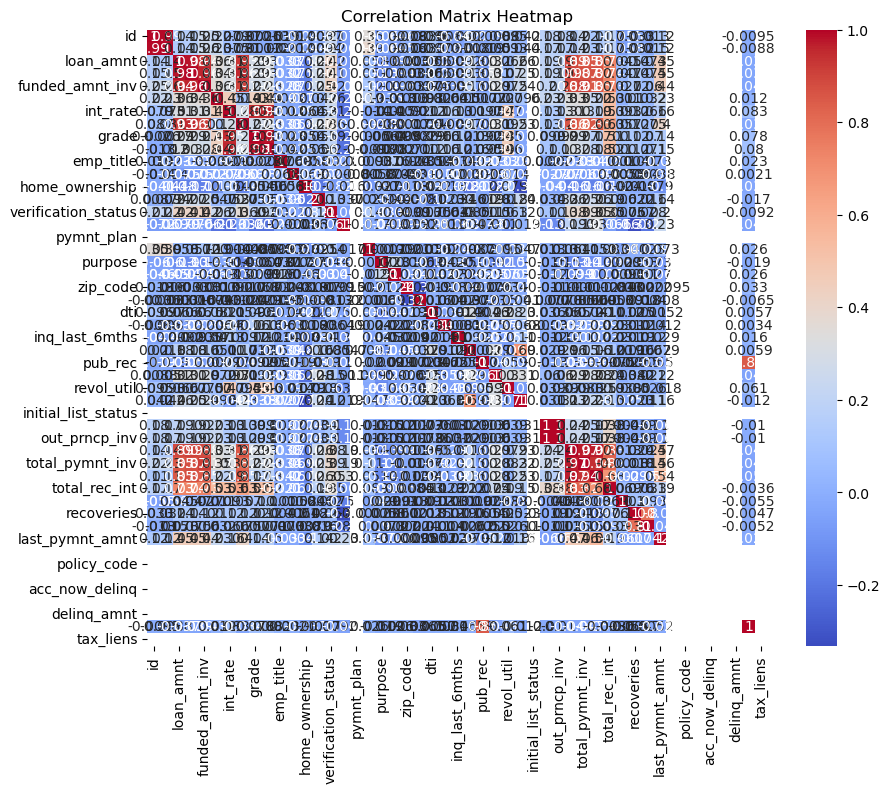

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
shown_features = correlation_matrix.columns.tolist()
print(f"Shown features: {shown_features}")
len(shown_features)

Shown features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


49

# let's use only above 33 columns for further purpose

In [15]:
df = df[shown_features]
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  int64  
 9   sub_grade                   39717 non-null  int64  
 10  emp_title                   39717 non-null  int64  
 11  emp_length                  39717 non-null  int64  
 12  home_ownership              39717 non-null  int64  
 13  annual_inc                  397

In [16]:
loan_status = df['loan_status']
df.drop('loan_status', axis=1, inplace=True)
df.loc[:, 'loan_status'] = loan_status

/tmp/ipykernel_20/863984271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('loan_status', axis=1, inplace=True)
/tmp/ipykernel_20/863984271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'loan_status'] = loan_status


In [17]:
# df

# now imputing the missing values

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df = imputer.fit_transform(df)
df = pd.DataFrame(df)
df = df.astype(int)

# splitting the dataset into depedent and independent variables

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Now let us split X and y variables into training and testing cases

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
X_train.shape, y_train.shape

((31773, 48), (31773,))

# Data Imbalancing

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
X_train.shape, y_train.shape

((79086, 48), (79086,))

In [24]:
y_train.value_counts()

2    26362
0    26362
1    26362
Name: 48, dtype: int64

# Standardization

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Multi-class Classification algorithms

# Let us start using different mulit-class machine learning classification algorithms to predict that whether loan borrower would pay issued loan or not and will that person pay loan fully or will that person should get charged since the possibility that person will pay issued loan is negligible or will that person be paying loan regularly

# Support Vector Machines

***Here, we are going create an instance of the SVC classifier and assign it to the variable svc. The kernel='rbf' parameter specifies that a radial basis function (RBF) kernel should be used. The RBF kernel is commonly used in SVM for nonlinear classification problems.***

In [26]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [27]:
svc_predictions = svc.predict(X_test)
svc_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [28]:
# y_train_pred = svc.predict(X_train)
# y_train_pred

In [29]:
# acc_train_svc = accuracy_score(y_train, y_train_pred)
# acc_train_svc

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc_svm = accuracy_score(y_test, svc_predictions) * 100
acc_svm

98.35095669687814

# Naive Bayes 

In [32]:
from sklearn.naive_bayes import MultinomialNB

***Here, we are going to create an instance of the MultinomialNB classifier and assign it to the variable mnb. The MultinomialNB classifier is specifically designed for classification tasks where the features are discrete counts, such as word counts in text classification.***

In [33]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [34]:
mnb_predictions = mnb.predict(X_test)
mnb_predictions

array([0, 2, 0, ..., 2, 2, 2])

In [35]:
acc_mnb = accuracy_score(y_test, mnb_predictions) * 100
acc_mnb

76.6742195367573

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

***Here, we are going to create an instance of the LogisticRegression classifier and assign it to the variable log_reg. The multi_class='ovr' parameter specifies that a one-vs-rest (OvR) strategy should be used for multi-class classification. The solver='saga' parameter sets the solver algorithm to be used during optimization.***

In [37]:
log_reg = LogisticRegression(multi_class='ovr', solver='saga')
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='saga')

In [38]:
log_reg_predictions = log_reg.predict(X_test)
log_reg_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [39]:
acc_log_reg = accuracy_score(y_test, log_reg_predictions) * 100
acc_log_reg

98.71601208459214

# K - Nearest Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier

***Here, we are creating an instance of the KNeighborsClassifier classifier and assign it to the variable knn. The n_neighbors=k parameter specifies that the classifier should consider the 5 nearest neighbors when making predictions.***

In [41]:
k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
knn_predictions = knn.predict(X_test)
knn_predictions

array([1, 2, 1, ..., 2, 2, 0])

In [43]:
acc_knn = accuracy_score(y_test, log_reg_predictions) * 100
acc_knn

98.71601208459214

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

***Here, we are creating an instance of the RandomForestClassifier classifier and assign it to the variable rfc. The n_estimators=n_estimators parameter specifies the number of decision trees in the random forest, and the random_state=42 parameter sets the random seed for reproducibility.***

In [45]:
n_estimators = 100  # Number of decision trees in the forest
rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
rfc_predictions = rfc.predict(X_test)
rfc_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [47]:
acc_rfc = accuracy_score(y_test, rfc_predictions) * 100
acc_rfc

99.60976837865056

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

***Here, we are going to create an instance of the DecisionTreeClassifier classifier and assign it to the variable dt. The DecisionTreeClassifier class represents a decision tree model for classification tasks.***

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
dt_predictions = dt.predict(X_test)
dt_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [51]:
acc_dt = accuracy_score(y_test, dt_predictions) * 100
acc_dt

99.45871097683786

In [52]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier

# AdaBoost

***we are creating a new instance of the AdaBoostClassifier class and assign it to the variable ada_boost. AdaBoost stands for Adaptive Boosting, which is a machine learning algorithm used for classification tasks. It belongs to the family of ensemble methods, meaning it combines multiple "weak" classifiers to create a stronger and more accurate classifier.***

In [53]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)

AdaBoostClassifier()

In [54]:
ada_predictions = ada_boost.predict(X_test)
ada_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [55]:
acc_ada_boost = accuracy_score(y_test, ada_predictions) * 100
acc_ada_boost

98.93001007049345

# Gradient Boosting

***we are going create a new instance of the GradientBoostingClassifier class and assign it to the variable grad_boost. Gradient Boosting is a powerful machine learning algorithm that belongs to the ensemble methods family. It works by sequentially adding new models to correct the mistakes made by the previous models. Each new model is trained on the residual errors of the previous models, gradually reducing the overall error.***

In [56]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [57]:
grad_predictions = grad_boost.predict(X_test)
grad_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [58]:
acc_grad_boost = accuracy_score(y_test, grad_predictions) * 100
acc_grad_boost

99.62235649546828

# Voting Classifier

***we are creating a new instance of the VotingClassifier class and assign it to the variable voting_classifier. The Voting Classifier is an ensemble machine learning algorithm that combines the predictions of multiple individual classifiers to make a final prediction. It operates based on the principle of majority voting, where each classifier's vote contributes to the final decision.***

***The estimators parameter represents a list of (name, estimator) tuples. Each tuple consists of a name to identify the classifier and the corresponding estimator object. These estimators can be instances of any classification algorithm, such as decision trees, support vector machines,ada boost or gradient boosting.***

In [59]:
estimators = [
    ('ada_boost', ada_boost),
    ('grad_boost', grad_boost),
    ('random_forest', rfc),
    ('Decision Tree', dt)
]

In [60]:
# Build the voting classifier
voting_classifier = VotingClassifier(estimators=estimators)
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('ada_boost', AdaBoostClassifier()),
                             ('grad_boost', GradientBoostingClassifier()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('Decision Tree', DecisionTreeClassifier())])

In [61]:
voting_predictions = voting_classifier.predict(X_test)
voting_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [62]:
acc_voting = accuracy_score(y_test, voting_predictions) * 100
acc_voting

99.64753272910373

# Stacking Classifier

***we are creating a new instance of the StackingClassifier class and assign it to the variable stacking_classifier. The Stacking Classifier is an ensemble machine learning algorithm that combines the predictions of multiple base models by training a meta-model on their outputs. It leverages the concept of stacking, where the base models act as "first-level" learners, and the meta-model acts as the "second-level" learner.***

***The estimators parameter is set to our list of base models, which we defined earlier. These base models will be used to generate predictions on the training data.***


***The final_estimator parameter is set to grad_boost, which is the Gradient Boosting classifier. This classifier serves as the meta-model and is trained on the predictions of the base models. It learns to make the final decision by combining the outputs of the base models.***

In [63]:
# Build the stacking classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=rfc)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('ada_boost', AdaBoostClassifier()),
                               ('grad_boost', GradientBoostingClassifier()),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('Decision Tree', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier(random_state=42))

In [64]:
stacking_predictions = stacking_classifier.predict(X_test)
stacking_predictions

array([2, 2, 0, ..., 0, 2, 2])

In [65]:
acc_stacking = accuracy_score(y_test, stacking_predictions) * 100
acc_stacking

99.77341389728097

# Performance on training set

In [66]:
stacking_train_predictions = stacking_classifier.predict(X_train)
stacking_train_predictions

array([2, 2, 2, ..., 1, 1, 1])

In [67]:
acc_train_stacking = accuracy_score(y_train, stacking_train_predictions) * 100
acc_train_stacking

100.0

# Isn't it surprising. I really need to validate these performances

# Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation strategy
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(stacking_classifier, X, y, cv=cv, scoring='accuracy')

# Print the average accuracy and standard deviation
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 1.00 (+/- 0.00)


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [70]:
# Precision
precision = precision_score(y_test, stacking_predictions, average='weighted')
precision

0.9977333838127183

In [71]:
# Recall
recall = recall_score(y_test, stacking_predictions, average='weighted')
recall

0.9977341389728097

In [72]:
# F1-score
f1 = f1_score(y_test, stacking_predictions, average='weighted')
f1

0.9977289220682307

In [73]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, stacking_predictions)
confusion_mat

array([[1079,    0,   15],
       [   0,  262,    0],
       [   3,    0, 6585]])

Let's break down the confusion matrix you provided:

Class 0: The model made 1083 correct predictions for class 0 instances (true negatives) and incorrectly predicted 11 instances from class 0 as belonging to other classes (false negatives). There were no instances incorrectly classified as class 0 when they belonged to other classes (false positives).

Class 1: The model made 262 correct predictions for class 1 instances (true positives). There were no instances incorrectly classified as class 1 (false positives or false negatives).

Class 2: The model made 6586 correct predictions for class 2 instances (true negatives) and incorrectly predicted 2 instances from class 2 as belonging to other classes (false negatives). There were no instances incorrectly classified as class 2 when they belonged to other classes (false positives).

# Now let us compare the performance of all considered models using accuracy scores achieved by each of the algorithms

In [74]:
accuracy_scores = {
    "Logistic Regression": acc_log_reg,
    "KNN": acc_knn,
    "Naive Bayes": acc_mnb,
    "SVM": acc_svm,
    "Random Forest": acc_rfc,
    "Decision Tree": acc_dt,
    "AdaBoost": acc_ada_boost,
    "Gradient Boosting": acc_grad_boost,
    "Stacking Classifier": acc_stacking,
    "Voting Classifier": acc_voting
}


In [75]:
# Convert the dictionary to a DataFrame
df_accuracy = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

# Sort the DataFrame by accuracy in descending order
df_accuracy = df_accuracy.sort_values(by='Accuracy', ascending=False)

# Reset the index of the DataFrame
df_accuracy = df_accuracy.reset_index()

# Rename the columns
df_accuracy = df_accuracy.rename(columns={'index': 'Algorithm'})

# Display the sorted DataFrame
print(df_accuracy)

             Algorithm   Accuracy
0  Stacking Classifier  99.773414
1    Voting Classifier  99.647533
2    Gradient Boosting  99.622356
3        Random Forest  99.609768
4        Decision Tree  99.458711
5             AdaBoost  98.930010
6  Logistic Regression  98.716012
7                  KNN  98.716012
8                  SVM  98.350957
9          Naive Bayes  76.674220


# Here we can observe that almost all algortihms are performing well on our test data and thus out of all the models used, we have got 99.83% accuracy on test/unseen data using stacking classifier

#                                                    Thank You for visiting the notebook